# CIE L\*a\*b\*系の色相を表示する

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def LABtoRGB(L,a,b):
#D65の場合
    Xn = 95.045
    Yn = 100
    Zn = 108.892
    
    delta = 6./29.
    def F(f,Wn):
        if f > delta:
            return (f**3)*Wn
        else:
            return ((3./29.)**3)*(116*f-16)*Wn
    def norm(x):
        if x < 0:
            return 0
        elif x > 1:
            return 1
        return x

    fy = (L+16)/116
    fx = fy + a/500
    fz = fy - b/200
    
    X = F(fx,Xn)
    Y = F(fy,Yn)
    Z = F(fz,Zn)
    R =(0.035064*X-0.017400*Y-0.005441*Z)
    G =(-0.010690*X+0.019777*Y+0.000352*Z)
    B =(0.000563*X-0.001970*Y+0.010511*Z)

    sR = int((norm(R)**(1/2.2))*255)
    sG = int((norm(G)**(1/2.2))*255)
    sB = int((norm(B)**(1/2.2))*255)
    return sR,sG,sB

In [3]:
def drawLab(L,a1,b1,a2,b2,xsize,ysize):
    im = Image.new('RGB',(xsize,ysize))
    for i in range(xsize):
        for j in range(ysize):
            im.putpixel((i,j),LABtoRGB(L,(a2-a1)/xsize*i+a1,b2-(b2-b1)/ysize*j))
    return im

In [4]:
img= drawLab(50,-20,-20,20,20,100,100)

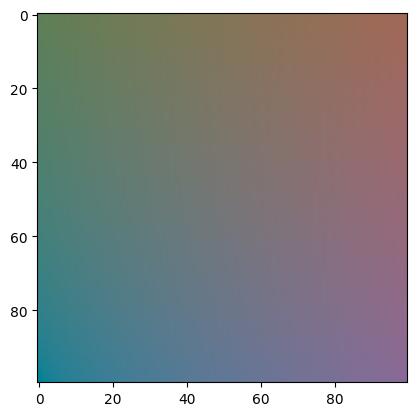

In [5]:
plt.imshow(img)